<a href="https://colab.research.google.com/github/eminshall/Notebooks-Youtube-Channel/blob/main/Identifying_Return_Factors_in_Crypto_Portfolio_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

import yfinance as yf
from datetime import datetime, date
import datetime

In [ ]:
portfolio = ['BTC-USD','ETH-USD','XRP-USD','USDT-USD','SOL-USD','BNB-USD','DOGE-USD']

years = 2
end = date.today()
start = end - datetime.timedelta(days = years*365)

data = yf.download(portfolio, start, end)['Close']

returns = data.pct_change().dropna()
returns.head()

[*********************100%***********************]  7 of 7 completed


Ticker,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,SOL-USD,USDT-USD,XRP-USD
Date,,,,,,,
2023-02-10,-0.000021,-0.007693,-0.004786,-0.020414,-0.015745,-0.000006,0.000468
2023-02-11,0.015237,0.010147,0.015810,0.016541,0.034773,0.000010,0.003562
2023-02-12,0.007449,-0.003780,-0.002768,-0.016165,0.031679,0.000047,-0.022723
2023-02-13,-0.058973,0.000913,0.000146,-0.005193,-0.032568,0.000723,-0.009611
2023-02-14,0.005586,0.018924,0.016773,0.032982,0.049776,-0.000529,0.028875


In [ ]:
pca = PCA(n_components=3)
pca.fit(returns)

pct = pca.explained_variance_ratio_
pca_components = pca.components_

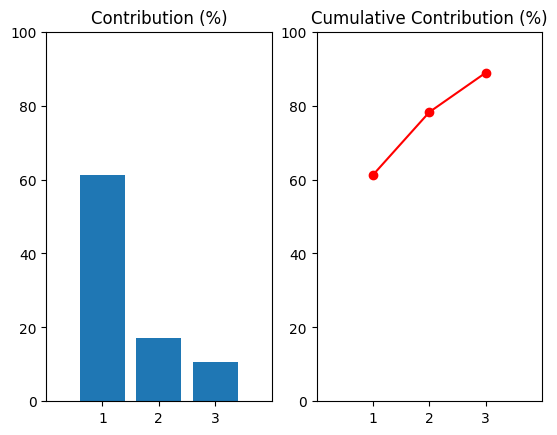

In [ ]:
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct) + 1, 1)
plt.subplot(1,2,1)
plt.bar(x, pct * 100, align='center')
plt.title('Contribution (%)')
plt.xticks(x)
plt.xlim([0,4])
plt.ylim([0,100])
plt.subplot(1,2,2)
plt.plot(x, cum_pct * 100, color='r', marker='o', linestyle='-')
plt.title('Cumulative Contribution (%)')
plt.xticks(x)
plt.xlim([0,4])
plt.ylim([0,100])
plt.show()

In [ ]:
X = np.asarray(returns)
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(data=factor_returns,
                              columns=['f1','f2','f3'],
                              index=returns.index)
factor_returns.head()

,f1,f2,f3
Date,,,
2023-02-10,-0.019375,0.010027,-0.007201
2023-02-11,0.039797,-0.016611,0.014115
2023-02-12,-0.000577,-0.026322,0.025654
2023-02-13,-0.036923,0.009284,-0.025670
2023-02-14,0.065151,-0.000739,0.023454


In [ ]:
factor_exposure = pd.DataFrame(
    index=['f1','f2','f3'],
    columns=returns.columns,
    data=pca_components
).T

factor_exposure.head()

,f1,f2,f3
Ticker,,,
BNB-USD,0.249513,-0.142496,0.032452
BTC-USD,0.294601,-0.155635,-0.033776
DOGE-USD,0.523920,-0.268666,-0.683029
ETH-USD,0.336834,-0.138654,-0.035604
SOL-USD,0.503913,-0.272773,0.727939


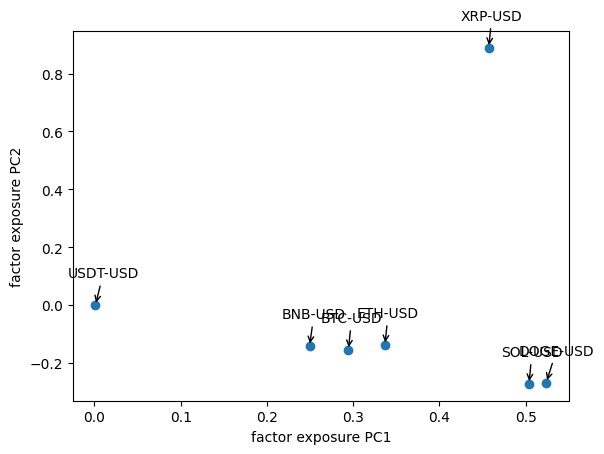

In [ ]:
labels = factor_exposure.index
data = factor_exposure.values
plt.scatter(data[:,0], data[:,1])
plt.xlabel('factor exposure PC1')
plt.ylabel('factor exposure PC2')
for label, x, y, in zip(labels, data[:,0], data[:,1]):
    plt.annotate(label, xy=(x,y),
                 xytext=(-20,20),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->',
                                 connectionstyle='arc3,rad=0'))
plt.show()

#Consider Supporting Me

Making theses videos takes time and effort. Contributions from viewers like you help support my channel and avoid the need for promoting a Patreon, sponsors, or selling a course. Click the link and choose any amount you'd like. Thank you.

https://ko-fi.com/minshallsfi